In [1]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
class myCallback1(tensorflow.keras.callbacks.Callback):
            def on_epoch_end(self, epoch, logs={}):
                if(logs.get('accuracy')>0.9950):
                    print("\nReached 99.50% accuracy so cancelling training!")
                    self.model.stop_training = True
callbacks=myCallback1()

In [3]:
fashion_mnist = tensorflow.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train=x_train.reshape(60000, 28, 28, 1)
x_train=x_train / 255.0
x_test= x_test.reshape(10000, 28, 28, 1)
x_test=x_test/255.0

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [5]:
EPOCHS=100
LEARNING_RATE=0.001

In [6]:
#we are using sparse_categorical_crossentropy hence no need to convert to one-hot vector
#y_train = tensorflow.keras.utils.to_categorical(y_train, CLASSES)
#y_test = tensorflow.keras.utils.to_categorical(y_test, CLASSES)

In [7]:
model=tensorflow.keras.Sequential([
  layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(128, (3,3), activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               819456    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [8]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [9]:
history=model.fit(
        x_train,y_train,
        epochs=EPOCHS,
        validation_data=(x_test,y_test),
        callbacks=[callbacks]
)

Epoch 1/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4080 - accuracy: 0.8514 - val_loss: 0.3137 - val_accuracy: 0.8858
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2745 - accuracy: 0.8982 - val_loss: 0.2878 - val_accuracy: 0.8967
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2254 - accuracy: 0.9160 - val_loss: 0.2600 - val_accuracy: 0.9049
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1896 - accuracy: 0.9289 - val_loss: 0.2471 - val_accuracy: 0.9127
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1600 - accuracy: 0.9397 - val_loss: 0.2460 - val_accuracy: 0.9150
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1332 - accuracy: 0.9496 - val_loss: 0.2625 - val_accuracy: 0.9131
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1115 - accuracy: 0.9577 - val_loss: 0.2843 - val_ac

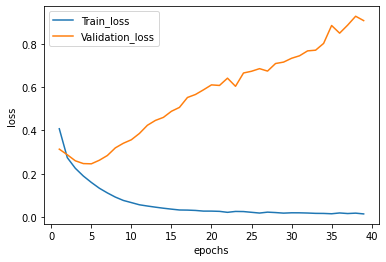

In [10]:
epochs=len(history.history['loss'])
plt.plot([i for i in range(1,epochs+1)],history.history['loss'],label="Train_loss")
plt.plot([i for i in range(1,epochs+1)],history.history['val_loss'],label="Validation_loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

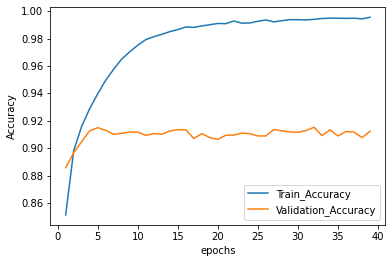

In [11]:
plt.plot([i for i in range(1,epochs+1)],history.history['accuracy'],label="Train_Accuracy")
plt.plot([i for i in range(1,epochs+1)],history.history['val_accuracy'],label="Validation_Accuracy")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()